In [22]:
import geopandas as gpd
DB11= gpd.read_file('https://github.com/TJZLiu/Lisbon-freguesias/blob/main/data/census%202011/BGRI2011_1106_all.gpkg?raw=true')

DB11['N_EDIFICIOS_CLASSICOS_1OU2'] = DB11['N_EDIFICIOS_CLASSICOS_1OU2'].astype(int)

# Keep the independent variables and dependent variable 'FR11' and the geometry data
df_11 = DB11.select_dtypes(include=['int','geometry']).drop(['ANO','NIVEL'], axis=1).copy()
df_11['FR11'] = DB11['FR11']

All_variables = df_11.select_dtypes(include=['int']).columns.to_list()

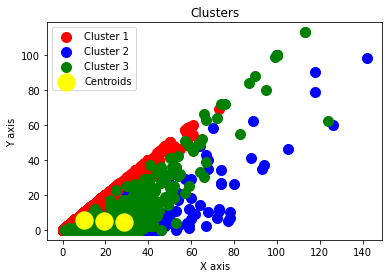

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

# Prepare the data
X = df_11[All_variables].values

# Choose the number of clusters
k = 3

# Initialize the centroids using k-means++
centroids = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X).cluster_centers_

# Compute the distances using the Manhattan distance metric
labels = pairwise_distances_argmin(X, centroids, metric='manhattan')

# Visualize the clusters
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()



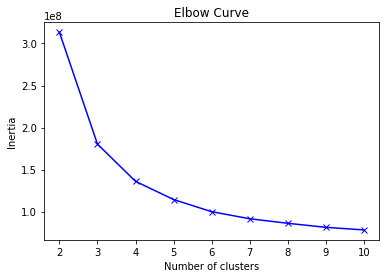

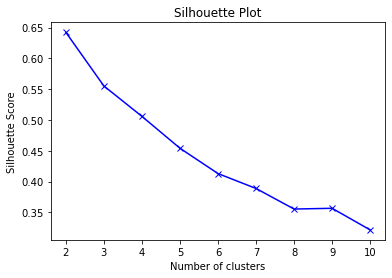

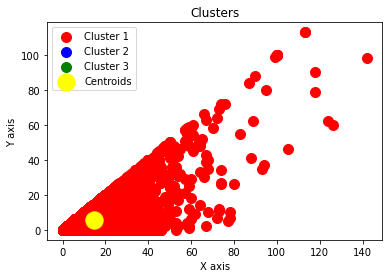

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

X=data

# Choose the range of k values to test
k_values = range(2, 11)

# Initialize lists to store inertia and silhouette scores for each k value
inertias = []
silhouette_scores = []

# Iterate over each k value
for k in k_values:
    # Initialize the k-means algorithm
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fit the k-means algorithm to the data
    kmeans.fit(X)
    
    # Compute the inertia and silhouette score for the clustering
    inertia = kmeans.inertia_
    silhouette_score = metrics.silhouette_score(X, kmeans.labels_)
    
    # Append the inertia and silhouette score to the lists
    inertias.append(inertia)
    silhouette_scores.append(silhouette_score)

# Plot the elbow curve to choose the optimal k value
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Plot the silhouette scores to choose the optimal k value
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.show()

# Choose the optimal k value
optimal_k = np.argmax(silhouette_scores) + 1

# Initialize the k-means algorithm with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the k-means algorithm to the data
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()


In [40]:
pip install gap-stat

Note: you may need to restart the kernel to use updated packages.Collecting gap-stat



KeyError: 'std_err'

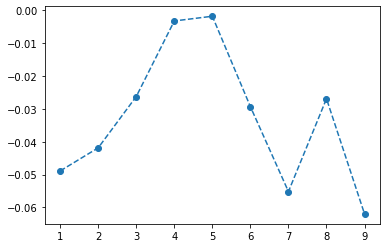

In [42]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from gap_statistic import OptimalK

# Generate some random data
X = np.random.rand(100, 10)

# Compute the optimal number of clusters using the gap statistic
optimal_k = OptimalK(parallel_backend='joblib')
n_clusters = optimal_k(X, cluster_array=np.arange(1, 10))

# Fit k-means with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Plot the elbow curve and the gap statistic
gap_df = optimal_k.gap_df
plt.plot(gap_df['n_clusters'], gap_df['gap_value'], linestyle='--', marker='o')
plt.errorbar(gap_df['n_clusters'], gap_df['gap_value'], yerr=gap_df['std_err'], linestyle='--', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Gap statistic')
plt.show()

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()


In [48]:
!pip install scikit-learn-extra

In [50]:
from sklearn_extra.cluster import KMeansWithSilhouette
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
X = np.random.rand(100, 10)

# Compute the gap statistic for k-means clustering
n_clusters = range(1, 10)
gap_values = []
for k in n_clusters:
    kmeans = KMeansWithSilhouette(n_clusters=k, random_state=42)
    kmeans.fit(X)
    gap_values.append(kmeans.gap)

# Plot the gap statistic
plt.plot(n_clusters, gap_values, linestyle='--', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Gap statistic')
plt.show()

# Fit k-means with the optimal number of clusters
optimal_k = np.argmax(np.array(gap_values)) + 1
kmeans = KMeansWithSilhouette(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()


ImportError: cannot import name 'KMeansWithSilhouette' from 'sklearn_extra.cluster' (C:\Users\Desmond\anaconda3\lib\site-packages\sklearn_extra\cluster\__init__.py)